In [4]:
import util
import numpy as np
%matplotlib inline

In [5]:
folder_path = "../data/language_data/"
langs = {}
for i in range(2008, 2019):
    vals = util.read_2D_values(folder_path + str(i) + ".csv")
    vals = vals[1:]
    for j in range(0, len(vals)):
        if vals[j][0] not in  langs.keys():
            langs[vals[j][0]] = {}
        langs[vals[j][0]][i] = vals[j][1]

# print( langs )
for lang in langs:
    temp = []
    for i in range(2008, 2019):
        if i in langs[lang].keys():
            temp.append( langs[lang][i] )
        else:
            temp.append( 0 )
    langs[lang] = temp

print( langs["Java"] )

['12866', '19205', '29343', '40864', '54808', '81606', '129050', '174900', '121317', '101151', '30756']


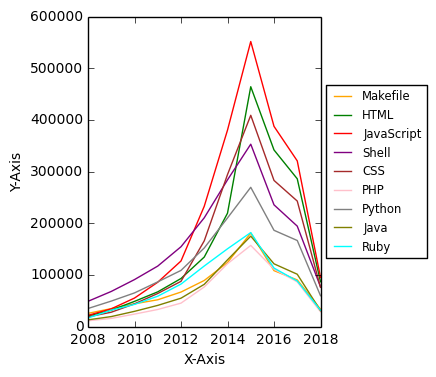

In [7]:
X_range = np.array( range(2008, 2019) )
plots = []
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
counter = 1
for lang in langs:
    langs[lang] = np.array( langs[lang] ).astype(np.float)
    if util.getMax( langs[lang] ) > 150000:
        plots.append( util.getYPlotObj(langs[lang], "line", label=lang, color=colors[counter%len(colors)]) )
        counter += 1
    else:
        pass
#         plots.append( util.getYPlotObj(langs[lang], "line", color=colors[counter%len(colors)]) )
util.plot_graph(X_range, plots, showLegend=True)

In [11]:
print( len( langs.keys() ) )

354
